<a href="https://colab.research.google.com/github/alejagaco/Prediccion-Precios-Vuelos/blob/main/Prediccion_PreciosVuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Precios de vuelos**

Fuente de datos: Kaggle

Link: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837&sortBy=voteCount 

In [176]:
ruta = "/content/drive/MyDrive/Coding Dojo/Proyecto_2/Flight_Predictions.csv"
df = pd.read_csv(ruta)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## **Descripción de los datos**

El dataset contiene información de reservas de vuelos realizados en la página web Easemytrip, vuelos realizados entre las ciudadades principales de la India. 

Airline: Aerolinea del vuelo

Flight: Número del vuelo

Source_city: Ciudad Origen del vuelo

Departure_time: Periodo de tiempo de la salida del vuelo, 'Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',   'Late_Night'

stops: Número de escalas

arrival_time: Hora de llegada a la ciudad destino

destination_city: Ciudad destino

class: clase de vuelo si fue económica o ejecutiva

duration: Duración del vuelo en horas

days_left: Días de anticipación con que fue comprado el vuelo

price : Precio del tiquete aereo


## Objetivo

Predecir el precio de los tiquetes aereos


¿Este es un problema de clasificación o regresión?: Problema de regresión

¿Cuántas características hay?: El dataset cuenta con 10 características 

¿Cuántas filas hay?: son 300153 filas

¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?: 

Con esta data se puede explorar:
* Como varian los precios por aerolinea
* Hay diferencia en el precio si se compra un día antes del vuelo vs varios días
* Como varía el precio según el número de escalas.
* Diferencia en el valor del tiquete para clase economica y ejecutiva

Adicional para predecir el precio de los tiquetes hay que realizar un preprocesamiento ya que la data cuenta con variables ordinales y nominales.


# EDA

In [178]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [179]:
df.drop(columns="Unnamed: 0",inplace=True)

In [180]:
df.duplicated().sum()

0

In [181]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [182]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [183]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [184]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [185]:
df['airline'] = df['airline'].str.capitalize()

In [186]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [187]:
df['class'].value_counts(normalize=True)

Economy     0.688536
Business    0.311464
Name: class, dtype: float64

## Visualization

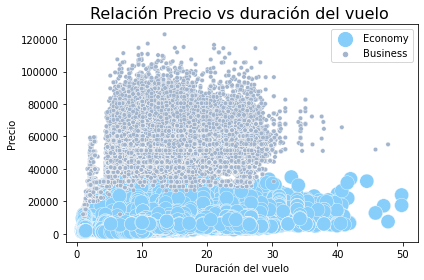

In [188]:
color = ['#87CEFA','#A2B5CD']
sns.scatterplot(data=df, x ='duration', y='price', hue='class', size='class',sizes=(20, 200), palette=color)

plt.title('Relación Precio vs duración del vuelo ', fontsize=16)

plt.xlabel('Duración del vuelo', fontsize=10)
plt.ylabel('Precio', fontsize=10)

plt.legend(loc='best')

plt.tight_layout()
plt.show()

De acuerdo con el gráfico anterior se observa como los precios de vuelos mas elevados son en la clase Business, y adicional se evidencia algunos valores atípicos en el precio de esta clase, donde fueron obtenidos a precios similares a los de la clase económica.

In [189]:
# Para cada ciudad origen cuantas ciudades destinos hay
df.groupby(['source_city'])[['destination_city']].nunique().reset_index().sort_values(by='destination_city',ascending=False)

,source_city,destination_city
0,Bangalore,5
1,Chennai,5
2,Delhi,5
3,Hyderabad,5
4,Kolkata,5
5,Mumbai,5


In [190]:
precio_prom_aerolinea = df.groupby(['airline','class'])[['price']].mean().reset_index().sort_values(by='price',ascending=False)
precio_prom_aerolinea.head()

,airline,class,price
6,Vistara,Business,55477.027777
0,Air_india,Business,47131.039212
7,Vistara,Economy,7806.943645
1,Air_india,Economy,7313.682169
5,Spicejet,Economy,6179.278881


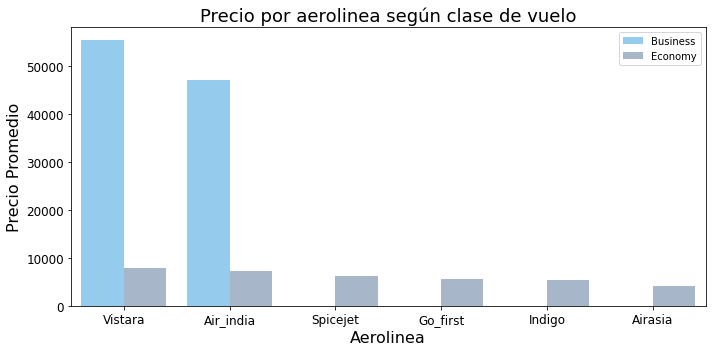

In [191]:
fig, ax = plt.subplots(figsize = (10, 5)) # Definir el tamaño del grafico, ancho, alto

color = ['#87CEFA','#A2B5CD']

ax1 = sns.barplot(data=precio_prom_aerolinea,x='airline',y='price',hue='class',palette=color)

ax1.set_ylabel('Precio Promedio', fontsize=16)
ax1.set_xlabel('Aerolinea', fontsize=16)

plt.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación
plt.title('Precio por aerolinea según clase de vuelo', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.tight_layout()
plt.show()

Las únicas dos aerolineas que ofrecen clase business son Air_India y Vistara, teniendo esta última un precio promedio mas elevado que Air_India. De igual forma, se aprecia que la aerolinea Airasia ofrece precios inferiores a las demas aerolineas

In [192]:
df_economic = df[df['class']=='Economy'].reset_index(drop=True)
df_economic = df_economic.groupby(['airline','days_left'])[['price']].mean().reset_index()

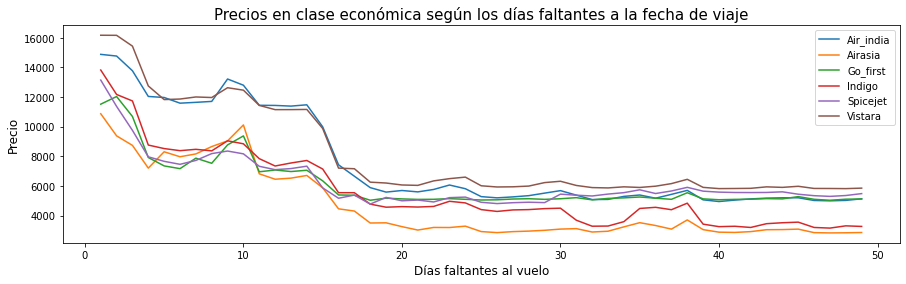

In [193]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_economic,x='days_left',y='price',color='blue',hue='airline')
plt.title('Precios en clase económica según los días faltantes a la fecha de viaje',fontsize=15)
plt.legend(fontsize=10)
plt.xlabel('Días faltantes al vuelo',fontsize=12)
plt.ylabel('Precio',fontsize=12)
plt.show()

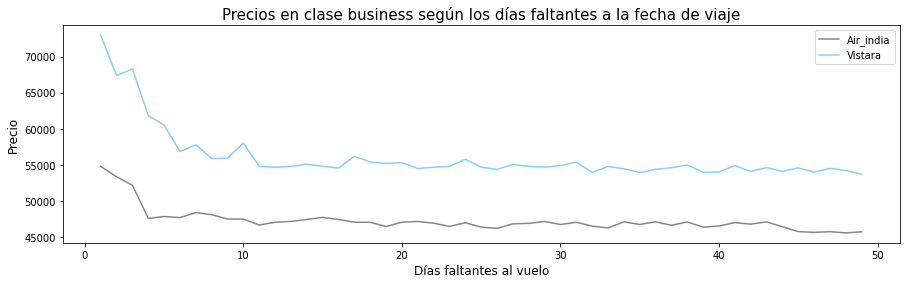

In [194]:
df_business = df[df['class']!='Economy'].reset_index(drop=True)
df_business = df_business.groupby(['airline','days_left'])[['price']].mean().reset_index()
plt.figure(figsize=(15,4))
colors =['#8B8386','#87CEFA']
sns.lineplot(data=df_business,x='days_left',y='price',hue='airline', palette=colors)
plt.title('Precios en clase business según los días faltantes a la fecha de viaje',fontsize=15)
plt.legend(fontsize=10)
plt.xlabel('Días faltantes al vuelo',fontsize=12)
plt.ylabel('Precio',fontsize=12)
plt.show()

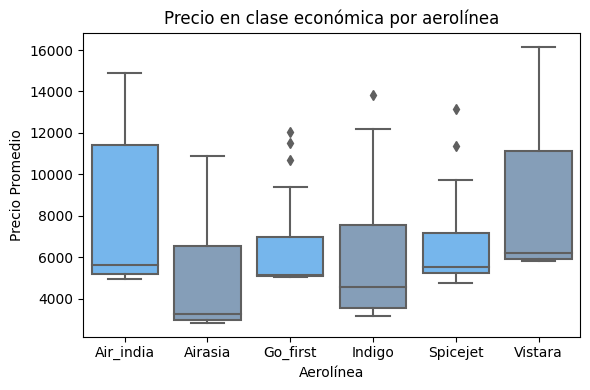

In [195]:
color = ['#63B8FF','#7D9EC0']

fig1=plt.figure(dpi=100);

sns.boxplot(data=df_economic,x='airline',y='price',palette=color)

plt.xlabel('Aerolínea', fontsize=10)
plt.ylabel('Precio Promedio', fontsize=10)

plt.title("Precio en clase económica por aerolínea")

plt.tight_layout()
plt.show()

In [196]:
# Precio promedio de cada trayecto según # de escalas para la clase económica
precio_prom_stops = df[df['class']=='Economy'].reset_index(drop=True)
precio_prom_stops = df.groupby(['airline','stops'])[['price']].mean().reset_index().sort_values(by='price',ascending=False)
precio_prom_stops.head()

,airline,stops,price
14,Vistara,one,32353.149720
0,Air_india,one,24805.782885
15,Vistara,two_or_more,18850.767996
16,Vistara,zero,16416.273587
2,Air_india,zero,14403.191918


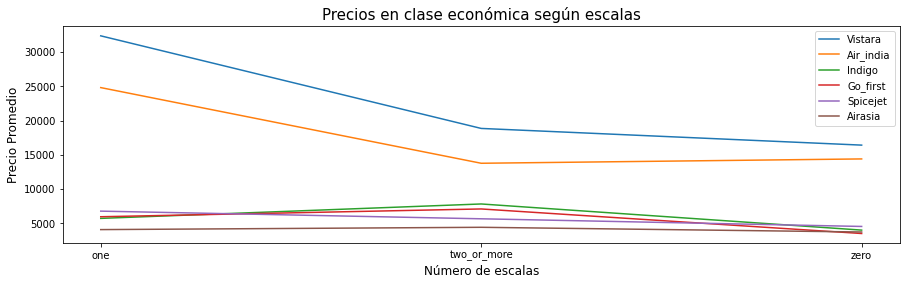

In [198]:
plt.figure(figsize=(15,4))
sns.lineplot(data=precio_prom_stops,x='stops',y='price',color='blue',hue='airline')
plt.title('Precios en clase económica según escalas',fontsize=15)
plt.legend(fontsize=10)
plt.xlabel('Número de escalas',fontsize=12)
plt.ylabel('Precio Promedio',fontsize=12)
plt.show()

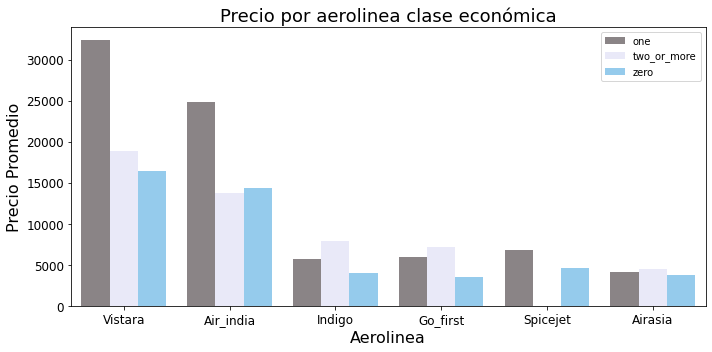

In [118]:
fig, ax = plt.subplots(figsize = (10, 5)) # Definir el tamaño del grafico, ancho, alto

colors =['#8B8386','#E6E6FA','#87CEFA']

ax1 = sns.barplot(data=precio_prom_stops,x='airline',y='price',hue='stops', palette=colors)
                  #palette=("ch:2.5,-.2,dark=.3")


ax1.set_ylabel('Precio Promedio', fontsize=16)
ax1.set_xlabel('Aerolinea', fontsize=16)

plt.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación
plt.title('Precio por aerolinea clase económica', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.tight_layout()
plt.show()

El precio promedio mas bajo es para los vuelos directos o que no tienen escala para todas las aerolíneas a excepción de Air India.
La aerolinea Spice Jet no ofrece vuelos con 2 o mas escalas. 

Para las aerolineas Indigo, Go first y Air Asia es mas costoso los vuelos que tienen 2 o mas escalas; mientras que para Vistara, Air India y SpiceJet es mas costoso los vuelos con 1 escala.

In [119]:
df_aerolineas = df.groupby(['airline'])[['price']].count().sort_values(by='price',ascending=False).reset_index()
df_aerolineas.rename(columns={'price':'Muestra'},inplace=True)
df_aerolineas

,airline,Muestra
0,Vistara,127859
1,Air_india,80892
2,Indigo,43120
3,Go_first,23173
4,Airasia,16098
5,Spicejet,9011


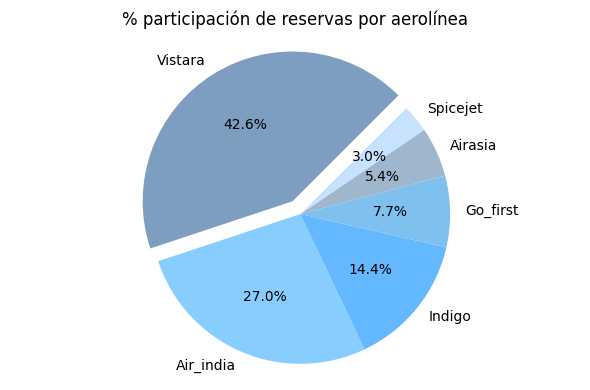

In [120]:
muestra = df_aerolineas['Muestra']
aerolinea = df_aerolineas['airline']


fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

explotar=[0.1,0,0,0,0,0]  # Para resaltar la categoria Upheld Complaints
colores = ['#7D9EC0','#87CEFF','#63B8FF','#7EC0EE','#9FB6CD','#C6E2FF']

def absolute_value(val):
  a = np.round(val,1)
  return a   #Para agregar los valores (%) en el pie

ax.pie(muestra, labels=aerolinea, explode=explotar, shadow=False, startangle=45, autopct='%.1f%%', colors= colores)
ax.axis("equal") ;

plt.title("% participación de reservas por aerolínea")
plt.tight_layout() #Para ajustar el gráfico
plt.show();

El 43% de los vuelos fueron realizados a través de la aerolinea Vistara, y la aerolinea menos utilizada fue Spicejet con un 3%.

In [121]:
df['Trayecto'] = df['source_city'] +' - ' +df['destination_city']
df_trayecto = df.groupby(['airline','Trayecto'])[['price']].count().reset_index()
df_tray = df_trayecto.groupby(['airline'])[['Trayecto']].count().sort_values(by='Trayecto',ascending=False).reset_index()
df_tray.head(10)

,airline,Trayecto
0,Air_india,30
1,Airasia,30
2,Go_first,30
3,Indigo,30
4,Vistara,30
5,Spicejet,27


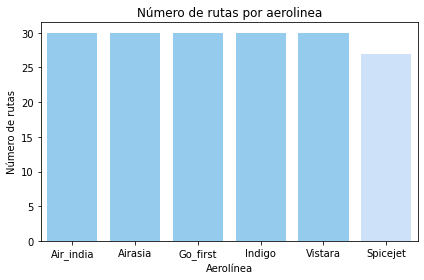

In [122]:
color = ['#87CEFA','#87CEFA','#87CEFA','#87CEFA','#87CEFA','#C6E2FF']

sns.barplot(data=df_tray, x='airline',y='Trayecto',palette=color)

plt.title('Número de rutas por aerolinea', fontsize=12)

plt.xlabel('Aerolínea', fontsize=10)
plt.ylabel('Número de rutas', fontsize=10)


plt.tight_layout()
plt.show()

De las 6 aerolineas analizadas, 5 ofrecen 30 rutas a excepción de Spicejet que ofrece 27 rutas.

In [123]:
# Rutas de la aerolinea Vistara en clase economica
df_vistara = df[(df['airline']=='Vistara') &(df['class']=='Economy') ].reset_index(drop=True)
vistara = df_vistara.groupby(['Trayecto','days_left'])[['price']].mean().reset_index().sort_values(by='price',ascending=False)
vistara.rename(columns={'price':'precio_prom'},inplace=True)
vistara.head()

,Trayecto,days_left,precio_prom
870,Hyderabad - Kolkata,2,21510.200000
387,Chennai - Kolkata,2,21453.071429
433,Chennai - Mumbai,2,20368.333333
245,Chennai - Bangalore,2,20364.640000
1014,Kolkata - Chennai,1,19902.750000


In [124]:
vistara_top4 = vistara[((vistara['Trayecto']=='Delhi - Mumbai') | (vistara['Trayecto']=='Mumbai - Delhi')) |
                       ((vistara['Trayecto']=='Delhi - Bangalore') | (vistara['Trayecto']=='Bangalore - Delhi'))]  #Bangalore - Mumbai

In [125]:
# Rutas de la aerolinea Air India en clase economica
df_airindia = df[(df['airline']=='Air_india') &(df['class']=='Economy') ].reset_index(drop=True)
airindia = df_airindia.groupby(['Trayecto','days_left'])[['price']].mean().reset_index().sort_values(by='price',ascending=False)
airindia.rename(columns={'price':'precio_prom'},inplace=True)
airindia.head()

,Trayecto,days_left,precio_prom
389,Chennai - Kolkata,1,33540.333333
245,Chennai - Bangalore,1,27681.000000
778,Hyderabad - Chennai,1,26020.000000
436,Chennai - Mumbai,1,25833.000000
874,Hyderabad - Kolkata,1,24640.428571


In [126]:
airindia_top4 = airindia[((airindia['Trayecto']=='Delhi - Mumbai') | (airindia['Trayecto']=='Mumbai - Delhi')) |
                       ((airindia['Trayecto']=='Mumbai - Hyderabad') | (airindia['Trayecto']=='Delhi - Kolkata'))]

<Figure size 780x520 with 0 Axes>

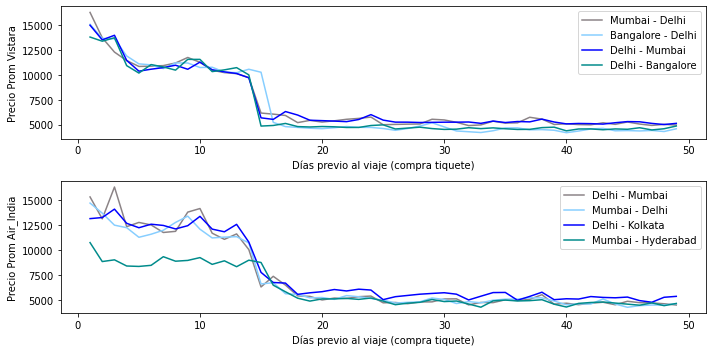

In [127]:
fig = plt.figure(dpi = 130)
fig,(ax0,ax1) = plt.subplots(2,1,figsize = (10, 5)) # Definir el tamaño del grafico, ancho, alto

color = ['#8B8386','#87CEFF','blue','#008B8B']

sns.lineplot(data=vistara_top4,x='days_left',y='precio_prom',hue='Trayecto', palette= color, ax=ax0)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax0.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación

ax0.set_ylabel('Precio Prom Vistara', fontsize=10)
ax0.set_xlabel('Días previo al viaje (compra tiquete)', fontsize=10)

sns.lineplot(data=airindia_top4,x='days_left',y='precio_prom',hue='Trayecto', palette= color, ax=ax1)

ax1.set_ylabel('Precio Prom Air_India', fontsize=10)
ax1.set_xlabel('Días previo al viaje (compra tiquete)', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.legend(loc='best')  #Ubicación automática para obtener la mejor ubicación

fig.tight_layout()
plt.show()

Analizando el top 4 de las rutas de las aerolineas Vistara y Air India en clase economica, se observa como los precios aumentan considerablemente a los 15 días antes del vuelo.

Es decir que si un pasajero desea comprar un tiquete a buen precio será mejor que lo compre mínimo a 20 días restantes para el vuelo.

In [128]:
df_trayecto = df.groupby(['airline','Trayecto','class']).agg({'days_left':'count', 'price':'mean'}).reset_index()
df_trayecto.head()

,airline,Trayecto,class,days_left,price
0,Air_india,Bangalore - Chennai,Business,621,56301.932367
1,Air_india,Bangalore - Chennai,Economy,989,8219.478261
2,Air_india,Bangalore - Delhi,Business,1083,40608.953832
3,Air_india,Bangalore - Delhi,Economy,1550,6787.892258
4,Air_india,Bangalore - Hyderabad,Business,791,51169.902655


In [129]:
# Top 10 de las rutas en clase económicas

df_trayecto.rename(columns={'days_left':'Conteo','price':'precio_prom'},inplace=True)
df_trayecto_economico = df_trayecto[df_trayecto['class']=='Economy'].reset_index(drop=True)
rutas = df_trayecto_economico.groupby(['Trayecto']).agg({'Conteo':'sum','precio_prom':'mean'}).reset_index()
rutas.sort_values(by=['Conteo'],ascending=False,inplace=True)
Top10_rutas = rutas.head(10).reset_index(drop=True)
Top10_rutas

,Trayecto,Conteo,precio_prom
0,Delhi - Bangalore,10144,6175.865765
1,Delhi - Mumbai,9982,5471.005764
2,Bangalore - Delhi,9959,6133.386436
3,Mumbai - Delhi,9801,5308.613455
4,Mumbai - Kolkata,8774,6685.180814
5,Bangalore - Mumbai,8743,5846.732524
6,Mumbai - Bangalore,8706,5790.992658
7,Delhi - Kolkata,8654,6685.887728
8,Kolkata - Mumbai,8103,6776.460793
9,Kolkata - Delhi,7816,6877.446568


In [130]:
# Filtrar las rutas Delhi - Bangalore y Bangalore - Delhi de las clase económica
top1 = df[((df['Trayecto']=="Delhi - Bangalore") | (df['Trayecto']=="Bangalore - Delhi")) & (df['class']=='Economy')].reset_index(drop=True)
#top1.head()

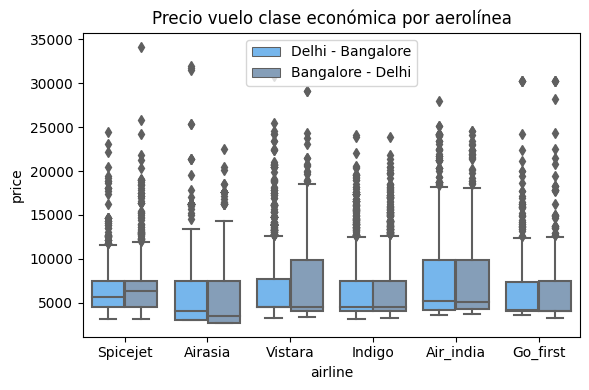

In [131]:
color = ['#63B8FF','#7D9EC0']

fig1=plt.figure(dpi=100);

sns.boxplot(data=top1,x='airline',y='price',hue='Trayecto',palette=color)

plt.legend(loc='best')

plt.title("Precio vuelo clase económica por aerolínea")

plt.tight_layout()
plt.show()

Analizando los precios de la clase economica de la ruta Top1 Delhi - Bangalore y su regreso, para todas las aerolineas, se obtiene:

* La aerolinea con mejores precios es Air Asia
* La aerolinea con mayor precio es Air India
* Se observa en cada aerolinea valores atípicos, de acuerdo al gráfico anterior se concluye que estos valores corresponde a los precios de los tiquetes adquiridos 15 días o menos al día del viaje

<Figure size 900x600 with 0 Axes>

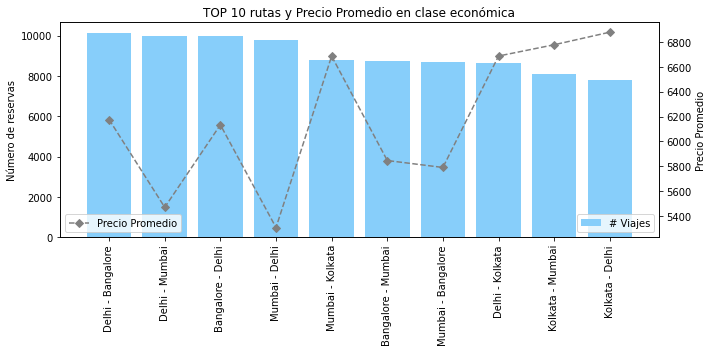

In [132]:
fig1=plt.figure(dpi=150);
fig1,ax1 = plt.subplots(figsize = (10, 5));

ax2 = ax1.twinx()

ax1.bar(Top10_rutas['Trayecto'],Top10_rutas['Conteo'],color='#87CEFA',label='# Viajes')
ax1.set_xticklabels(Top10_rutas['Trayecto'], rotation=90, fontsize=10);
#ax1.grid(b=False, linestyle='-.',linewidth= 0.5, alpha=0.6)

ax2.plot(Top10_rutas['Trayecto'],Top10_rutas['precio_prom'],'gD--',color='grey',label='Precio Promedio')

ax1.set_ylabel('Número de reservas',fontsize=10)
ax2.set_ylabel('Precio Promedio',fontsize=10)

plt.title('TOP 10 rutas y Precio Promedio en clase económica', fontsize=12)
ax1.legend(loc='lower right') 
ax2.legend(loc='lower left') 

fig1.tight_layout();
plt.show()

De acuerdo con el top 10 de las rutas se observa: 

* La ruta mas viajada es Delhi-Bangalore el cual tiene un precio promedio de 6.000 para la clase económica.
* En el puesto 10 esta la ruta Kolkata - Delhi con 7.816 tiquetes comprados, sin embargo con el precio promedio mas alto en clase económica, 6.877



In [133]:
# Se reemplaza el número de escalas por números
# Zero: 0
# One: 1
# Two or more: 2
df['stops'].replace({'zero':0,'one':1,'two_or_more':2},inplace=True)

In [134]:
# Se reemplaza economic por 0 y Bussiness y 1
df['class'].replace({'Economy':0,'Business':1},inplace=True)

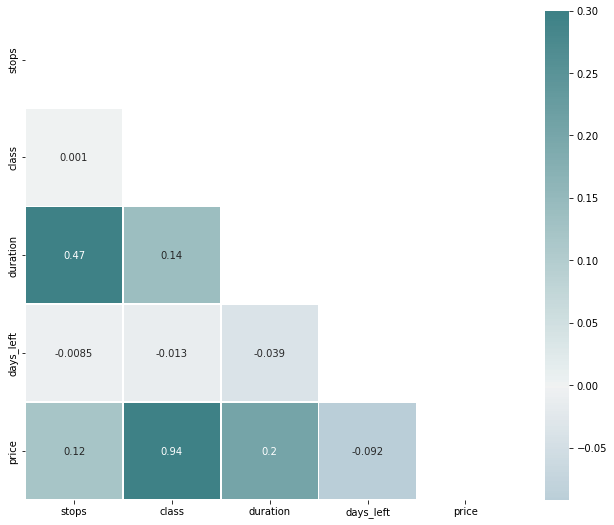

In [135]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 200, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0})

La variable que tiene una mayor relación con el precio es la clase de viaje, tiene una relación directa del 94%.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  Trayecto          300153 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 27.5+ MB


In [137]:
df.drop(columns='Trayecto',inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,Spicejet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,Airasia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


# Machine Learning

In [138]:
df['flight'].nunique()

1561

In [139]:
df.drop(columns='flight',inplace=True) 
#La columna flight no es relevante para la predicción del precio

In [140]:
df = pd.get_dummies(df,prefix=['airline','source_city','departure_time','arrival_time','destination_city'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   class                         300153 non-null  int64  
 2   duration                      300153 non-null  float64
 3   days_left                     300153 non-null  int64  
 4   price                         300153 non-null  int64  
 5   airline_Air_india             300153 non-null  uint8  
 6   airline_Airasia               300153 non-null  uint8  
 7   airline_Go_first              300153 non-null  uint8  
 8   airline_Indigo                300153 non-null  uint8  
 9   airline_Spicejet              300153 non-null  uint8  
 10  airline_Vistara               300153 non-null  uint8  
 11  source_city_Bangalore         300153 non-null  uint8  
 12  source_city_Chennai           300153 non-nul

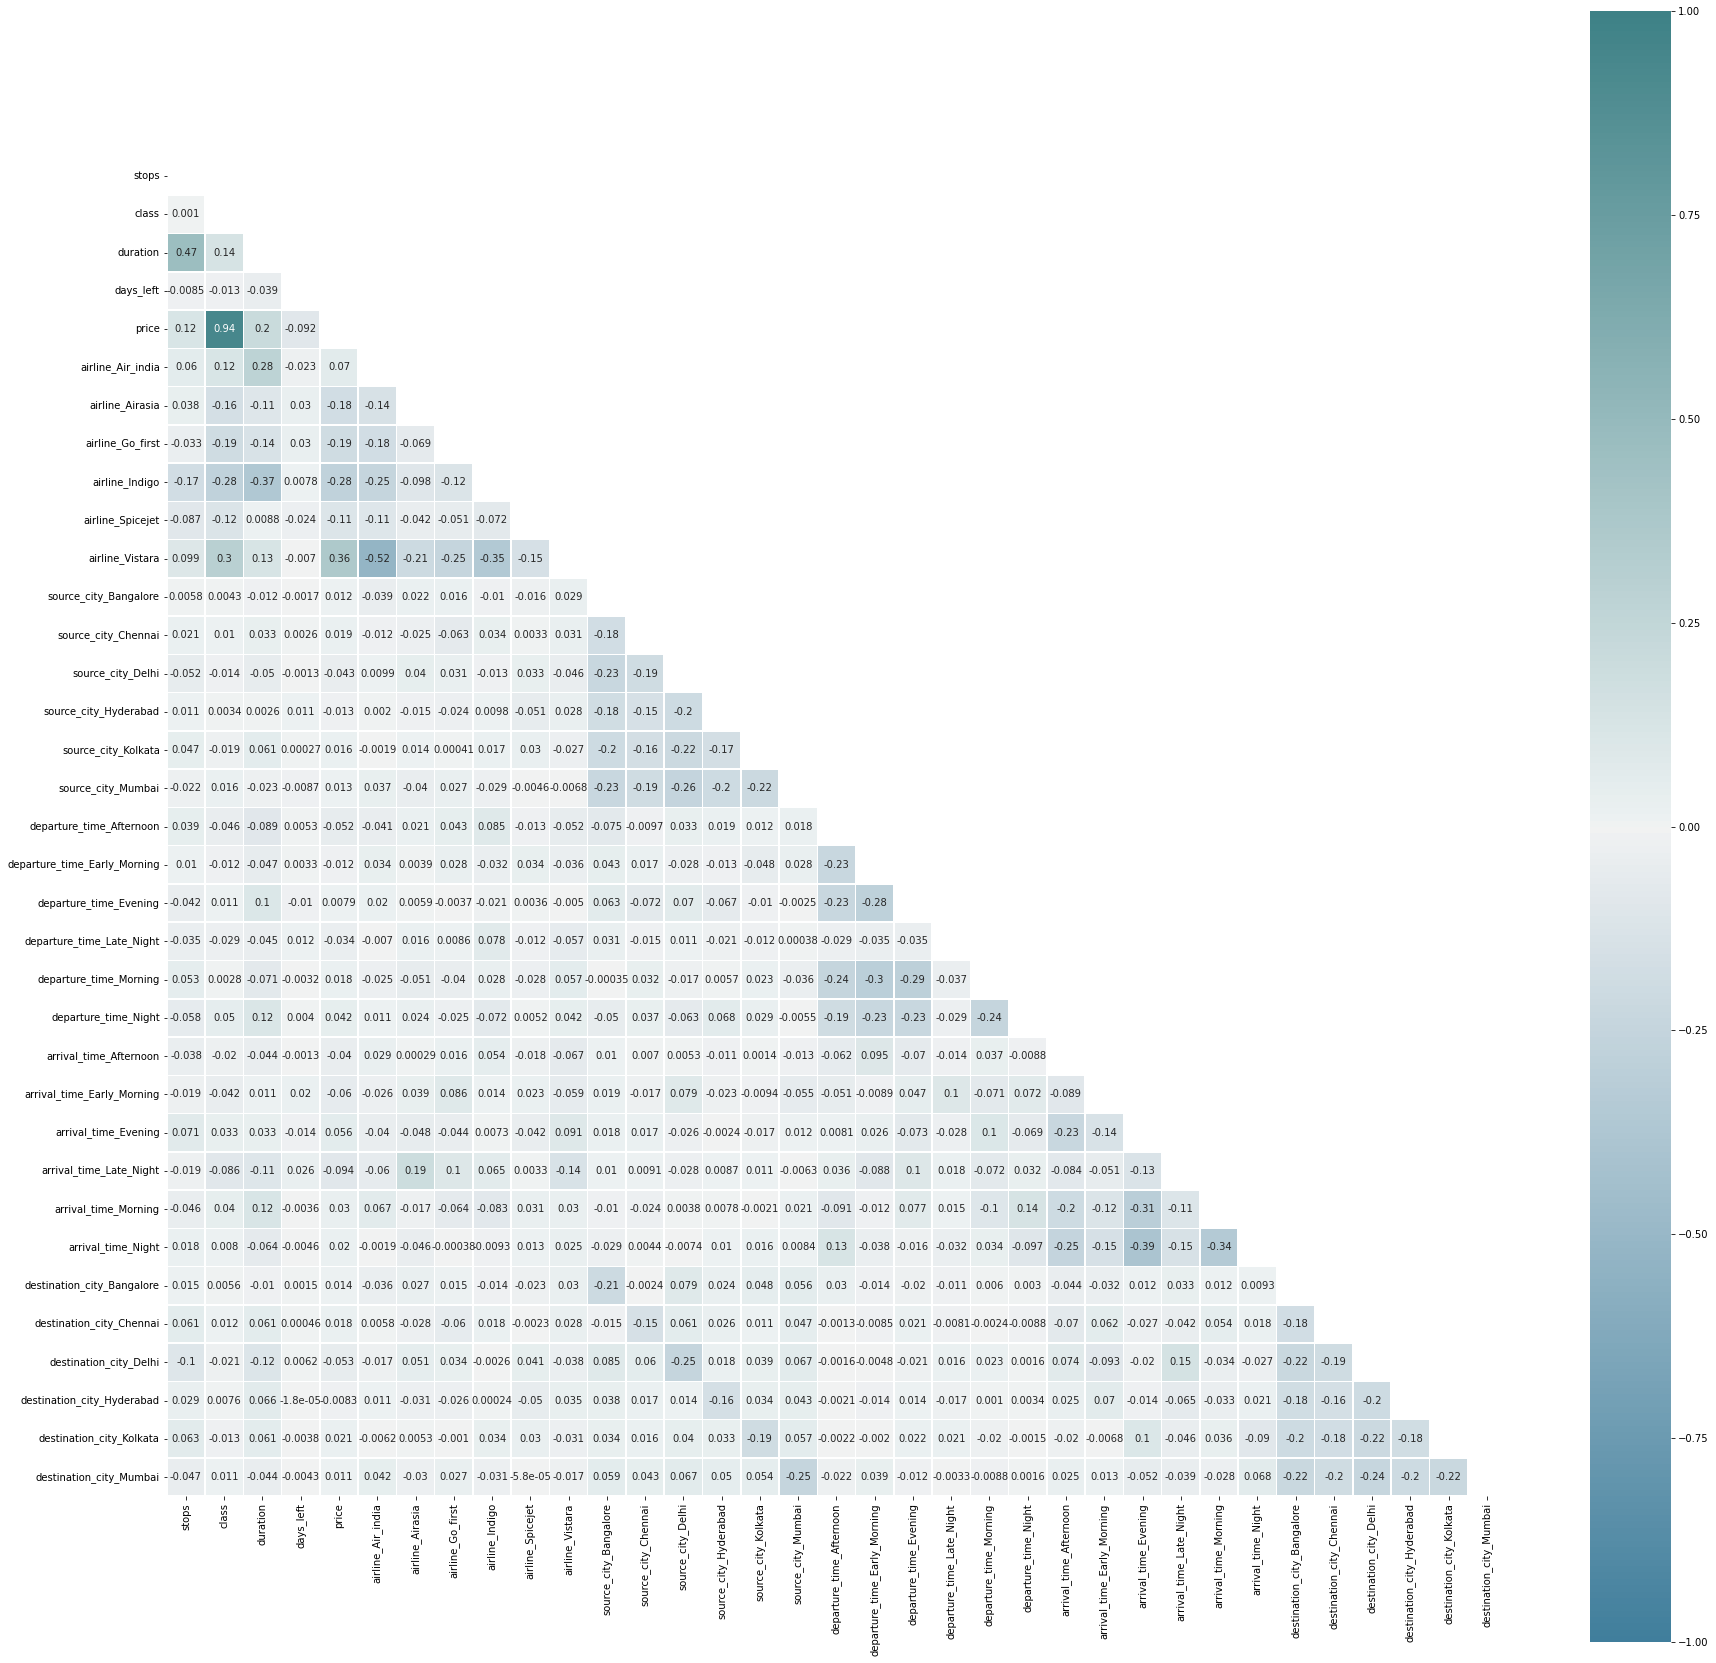

In [148]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# Set up the matplotlib figure
plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 200, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), annot=True,mask=mask, cmap=cmap, vmin= -1.0,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [49]:
# Matriz de característca y objetivo
X = df.drop(columns='price')
y = df['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.9)

In [51]:
scaler = StandardScaler()

In [52]:
modelo1 = LinearRegression()
reg = make_pipeline(scaler,modelo1)
reg.fit(X_train,y_train)
print("Score Train: ",round(reg.score(X_train, y_train),3))
print("Score Test: ",round(reg.score(X_test, y_test),3))

Score Train:  0.91
Score Test:  0.91


In [53]:
modelo2 = DecisionTreeRegressor()
dt= make_pipeline(scaler,modelo2)
dt.fit(X_train,y_train)
print("Score Train: ",round(dt.score(X_train, y_train),3))
print("Score Test: ",round(dt.score(X_test, y_test),3))

Score Train:  0.999
Score Test:  0.976


# Referencias

* [Datos Precio Vuelos](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?datasetId=1957837&sortBy=voteCount)
* [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
* [Colors code](https://www.webucator.com/article/python-color-constants-module/)
* [Coding Dojo Plataforma](https://login.codingdojo.com/m/504/12411/100100)
* [Heat map](https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap)